In [1]:
from deck import BlackjackShoe
from dealer import Dealer
from round import BlackjackRound
from hand import Hand
from game import Game, BLACKJACKSIXTOFIVEPAYOUT, BLACKJACKTHREETOTWOPAYOUT
from strategies.strategy import StrategyTable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
rounds = []
games = []
num_players = 1
num_games = 10000
bet_size = 100
num_rounds = 100
for _ in range(num_games):
    game = Game(8, num_players=num_players, strategy=StrategyTable["MULTIDECK"], hit_on_soft_17=True, blackjack_payout=BLACKJACKTHREETOTWOPAYOUT, min_bet=bet_size, denominations=100, player_bankroll=0, resplit_till=4)
    round_data = game.play(num_rounds, print_cards=False)
    rounds.extend(round_data)
    games.append(game.house_bankroll)

sum = 0
wins = 0
losses = 0
pushes = 0
for g in rounds:
    if g > 0:
        wins += 1
    elif g < 0:
        losses += 1
    else:
        pushes += 1
    sum += g
print(sum)

print(sum / num_players / num_games / num_rounds)
print(f"Wins: {wins / num_rounds}, Losses: {losses / num_rounds}, Pushes: {pushes / num_rounds}")
print()

=== Results After 100 Games ===
Player 0: $700
House Bankroll: $-700
Cards Left: 203
Decks Left: 4.0
=== Results After 100 Games ===
Player 0: $2950
House Bankroll: $-2950
Cards Left: 170
Decks Left: 3.0
=== Results After 100 Games ===
Player 0: $-2100
House Bankroll: $2100
Cards Left: 177
Decks Left: 3.5
=== Results After 100 Games ===
Player 0: $1100.0
House Bankroll: $-1100.0
Cards Left: 201
Decks Left: 4.0
=== Results After 100 Games ===
Player 0: $2800
House Bankroll: $-2800
Cards Left: 200
Decks Left: 4.0
=== Results After 100 Games ===
Player 0: $1200
House Bankroll: $-1200
Cards Left: 178
Decks Left: 3.5
=== Results After 100 Games ===
Player 0: $-2150.0
House Bankroll: $2150.0
Cards Left: 161
Decks Left: 3.0
=== Results After 100 Games ===
Player 0: $300.0
House Bankroll: $-300.0
Cards Left: 189
Decks Left: 3.5
=== Results After 100 Games ===
Player 0: $-1100
House Bankroll: $1100
Cards Left: 165
Decks Left: 3.0
=== Results After 100 Games ===
Player 0: $-2600
House Bankroll: 

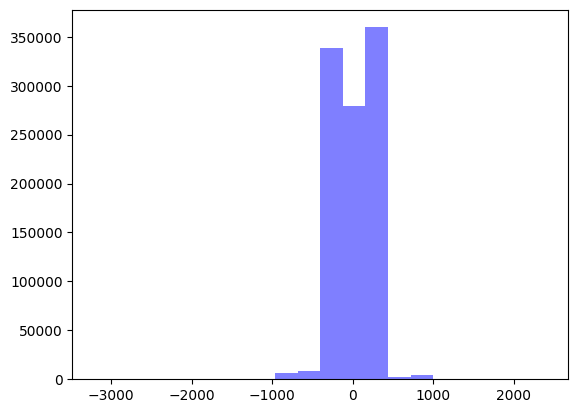

In [5]:
plt.hist(rounds, bins=20, facecolor="blue", alpha=0.5)

plt.show()

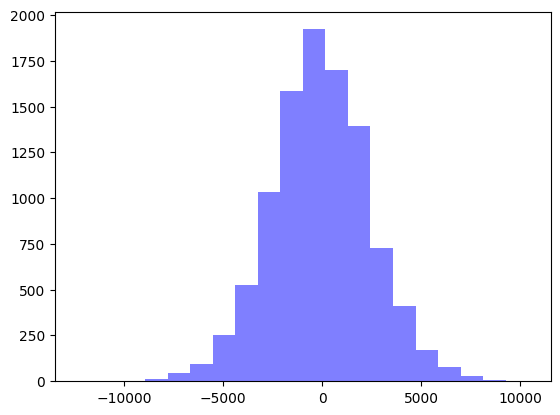

In [6]:
plt.hist(games, bins=20, facecolor="blue", alpha=0.5)
# sns.kdeplot(games)

plt.show()

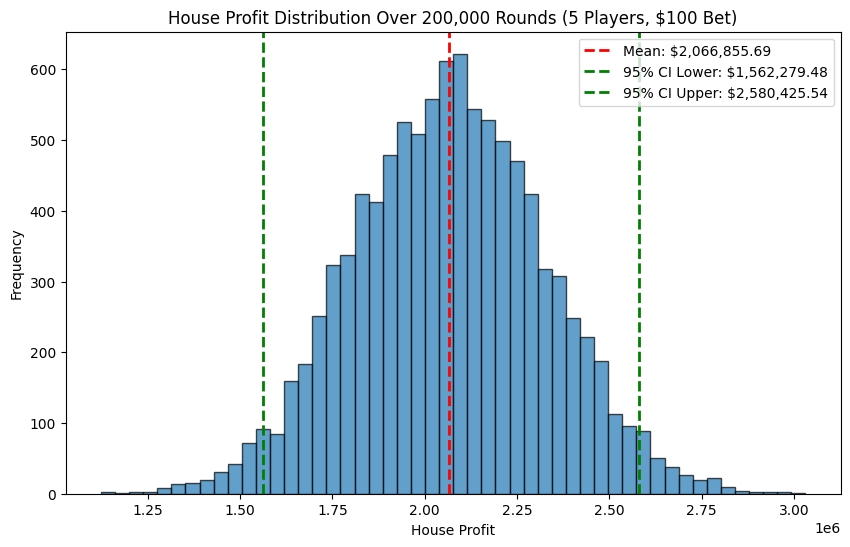

Expected House Profit: $2,066,855.69
95% Confidence Interval: ($1,562,279.48, $2,580,425.54)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert house bankroll changes (games list) into profits per game
house_profits = np.array(games)  # Assuming games stores house profit for each game

# Calculate statistics
mean_house_profit = np.mean(house_profits)
ci_lower = np.percentile(house_profits, 2.5)
ci_upper = np.percentile(house_profits, 97.5)

# Plot histogram of actual house profits
plt.figure(figsize=(10, 6))
plt.hist(house_profits, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mean_house_profit, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_house_profit:,.2f}')
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Lower: ${ci_lower:,.2f}')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Upper: ${ci_upper:,.2f}')
plt.title(f'House Profit Distribution Over {num_games} Games ({num_players} Player(s), ${bet_size} Bet)')
plt.xlabel('House Profit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Expected House Profit: ${mean_house_profit:,.2f}")
print(f"95% Confidence Interval: (${ci_lower:,.2f}, ${ci_upper:,.2f})")


In [12]:
import numpy as np

# Example: house_wins is an array of house profit per round from your simulation.
# For illustration, let's assume you already simulated these values.
# house_wins = np.array([...])
house_wins = np.array(rounds)
n = len(house_wins)
sample_mean = np.mean(house_wins)
sample_std = np.std(house_wins, ddof=1)


In [13]:
from scipy import stats

# Hypothesized mean (e.g., house edge is $2.50 per round)
mu0 = 0.41349 * 1

# Calculate the t statistic
t_statistic = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# Degrees of freedom is n-1
df = n - 1

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

print(f"Sample Mean: {sample_mean:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


Sample Mean: 0.2820
t-statistic: -3.6098
p-value: 0.0003
